In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


In [ ]:
data = pd.read_csv('DataUTS.csv')
data.head()

Time (s)  ...  Linear Acceleration z (m/s^2)
0  0.042561  ...                       0.254360
1  0.052659  ...                       0.187937
2  0.062757  ...                       0.156899
3  0.072855  ...                       0.024047
4  0.082952  ...                      -0.183616

[5 rows x 4 columns]

In [ ]:
data.rename(columns = {'Linear Acceleration x (m/s^2)':'xAxis'}, inplace = True)
data.rename(columns = {'Linear Acceleration y (m/s^2)':'yAxis'}, inplace = True)
data.rename(columns = {'Linear Acceleration z (m/s^2)':'zAxis'}, inplace = True)
data.rename(columns = {'Time (s)':'time'}, inplace = True)

In [ ]:
data.head()

time     xAxis     yAxis     zAxis
0  0.042561 -0.053073  0.111337  0.254360
1  0.052659 -0.063587  0.326508  0.187937
2  0.062757  0.003445  0.531328  0.156899
3  0.072855 -0.061254  0.609094  0.024047
4  0.082952 -0.056146  0.596915 -0.183616

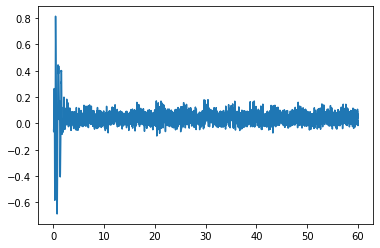

In [ ]:
plt.plot(data['time'], data['xAxis'])

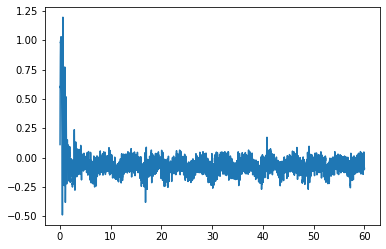

In [ ]:
plt.plot(data['time'], data['yAxis'])

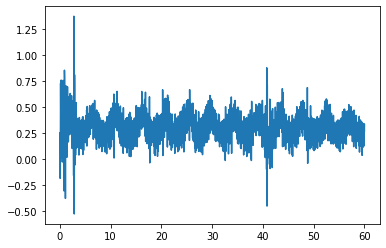

In [ ]:
plt.plot(data['time'], data['zAxis'])

In [ ]:
hasil =  np.arctan2(data.zAxis,data.yAxis)
hasil


0       1.158205
1       0.522283
2       0.287136
3       0.039459
4      -0.298422
          ...   
5935    1.913514
5936    1.882416
5937    1.909377
5938    1.860801
5939    1.900784
Length: 5940, dtype: float64

In [ ]:
from scipy.signal import butter,filtfilt
def butter_lowpass_filter(data, cutoff, fs, order):
    normal_cutoff = cutoff / nyq
    b, a = butter(order, normal_cutoff, btype='low', analog=False)
    y = filtfilt(b, a, data)
    return y

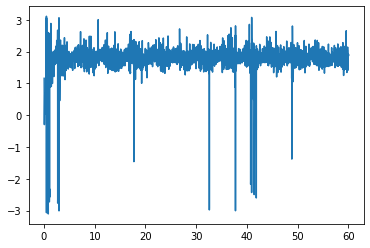

In [ ]:
plt.plot(data['time'], hasil)

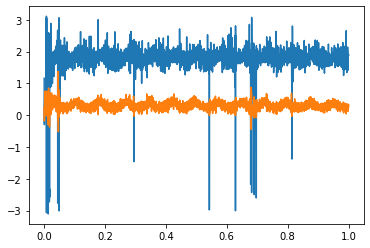

In [ ]:
x1 = np.linspace(0, 1, len(data['zAxis']))
x2 = np.linspace(0, 1, len(hasil))
plt.plot(x2, hasil)
plt.plot(x1, data['zAxis'])

plt.show()

In [ ]:
def butter_lowpass_filter(data, cutoff, fs, order):
    normal_cutoff = cutoff / nyq
    b, a = butter(order, normal_cutoff, btype='low', analog=False)
    y = filtfilt(b, a, data)
    return y

In [ ]:
from scipy.signal import butter,filtfilt


ygdipakey = data['yAxis']
ygdipakex = data['xAxis']
ygdipakez = data['zAxis']
fs = 50
nyq = 0.5 * fs
order = 2
cutoff =  0.8
hasilx = butter_lowpass_filter(ygdipakex, cutoff, fs, order)
hasily = butter_lowpass_filter(ygdipakey, cutoff, fs, order)
hasilz = butter_lowpass_filter(ygdipakez, cutoff, fs, order)

timeLPF = data['time']

filter_xyz = {'Time' : timeLPF, 'SumbuX' : hasilx, 'SumbuY' : hasily, 'SumbuZ' : hasilz}
dataxyz = pd.DataFrame(filter_xyz)
dataxyz.head(3)



Time    SumbuX    SumbuY    SumbuZ
0  0.042561 -0.096012  0.132164  0.260155
1  0.052659 -0.088588  0.187791  0.273071
2  0.062757 -0.081615  0.242650  0.285873

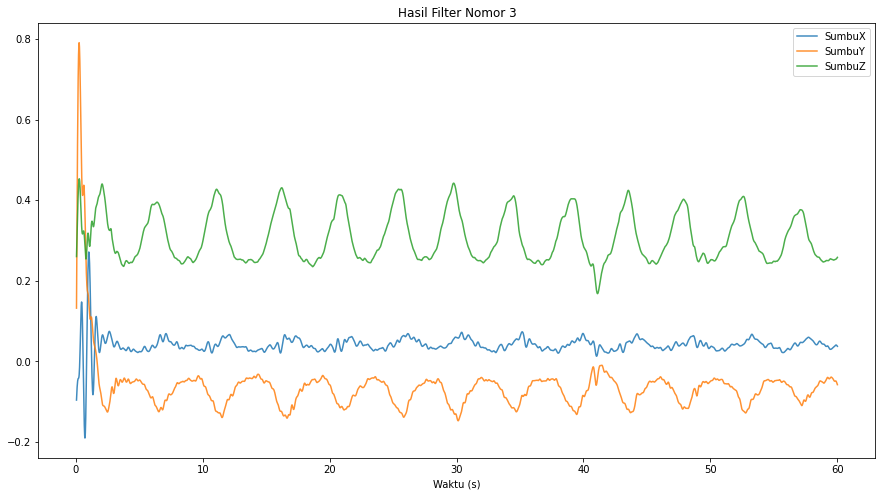

In [ ]:

dataxyz.plot(x='Time', figsize=(15,8), alpha=0.85)
plt.title("Hasil Filter Nomor 3")
plt.xlabel("Waktu (s)")

plt.show()

In [ ]:
hasilinklinasizx =  np.arctan2(data.zAxis,data.xAxis)
hasilinklinasizy =  np.arctan2(data.zAxis,data.yAxis)
yangdipakezx = hasilinklinasizx
yangdipakezy = hasilinklinasizy
hasilzx = butter_lowpass_filter(yangdipakezx, cutoff, fs, order)
hasilzy = butter_lowpass_filter(yangdipakezy, cutoff, fs, order)
timeLPFno4 = data['time']

filter_inklinasi = {'Time' : timeLPF, 'Inklinasi ZX' : hasilzx, 'Inklinasi ZY' : hasilzy}
data_filter_Inklinasi = pd.DataFrame(filter_inklinasi)
data_filter_Inklinasi.head(3)




Time  Inklinasi ZX  Inklinasi ZY
0  0.042561      1.849109      1.137124
1  0.052659      1.806412      1.084499
2  0.062757      1.764933      1.032695

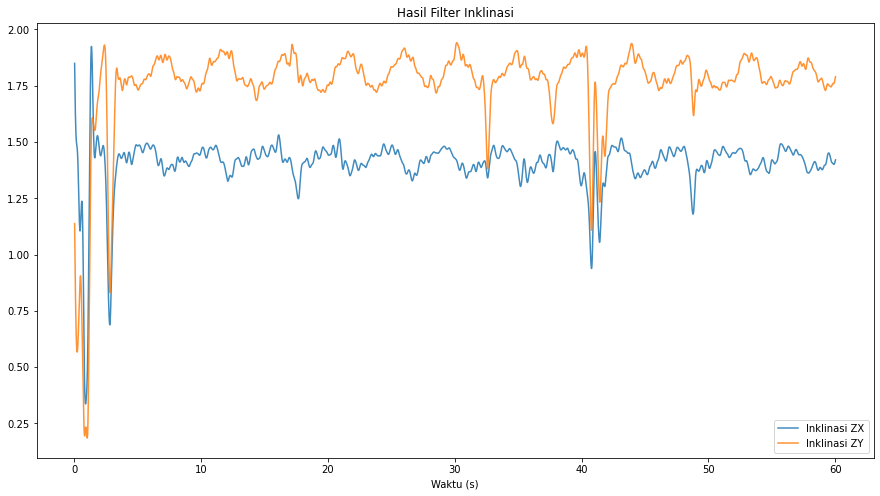

In [ ]:
data_filter_Inklinasi.plot(x='Time', figsize=(15,8), alpha=0.85)
plt.title("Hasil Filter Inklinasi")
plt.xlabel("Waktu (s)")
plt.show()

In [ ]:
from scipy.signal import find_peaks

peaks_x, _ = find_peaks(dataxyz['SumbuX'])
peaks_y, _ = find_peaks(dataxyz['SumbuY'])
peaks_z, _ = find_peaks(dataxyz['SumbuZ'])
peaks_zx, _ = find_peaks(data_filter_Inklinasi['Inklinasi ZX'])
peaks_zy, _ = find_peaks(data_filter_Inklinasi['Inklinasi ZY'])

print('\nTitik puncak Sumbu X  : ', peaks_x)
print('\nTitik puncak Sumbu Y  : ', peaks_y)
print('\nTitik puncak Sumbu Z  : ', peaks_z)
print('\nTitik puncak Sudut ZX (Inklinasi) : ', peaks_zx)
print('\nTitik puncak Sudut ZY (Inklinasi) : ', peaks_zy)


Titik puncak Sumbu X  :  [  40   96  154  204  256  317  362  405  444  492  531  593  653  698
  732  782  822  855  893  913  978 1028 1085 1143 1193 1266 1298 1320
 1358 1386 1445 1510 1568 1625 1659 1712 1796 1832 1858 1918 1982 2040
 2094 2147 2215 2252 2272 2334 2371 2388 2450 2505 2553 2587 2632 2671
 2725 2765 2786 2841 2914 2958 3006 3058 3133 3170 3189 3219 3256 3314
 3378 3435 3479 3535 3574 3615 3678 3737 3796 3834 3869 3912 3953 3989
 4033 4085 4176 4242 4317 4375 4414 4495 4531 4556 4617 4679 4733 4814
 4870 4914 4955 5040 5116 5154 5234 5272 5305 5419 5457 5485 5552 5608
 5653 5713 5801 5861 5928]

Titik puncak Sumbu Y  :  [  20   57  115  278  309  343  373  404  467  492  525  593  660  694
  723  788  830  855  876  917  951  975 1062 1116 1181 1206 1266 1300
 1328 1351 1386 1417 1480 1596 1628 1658 1682 1746 1781 1804 1843 1859
 1922 2070 2118 2161 2215 2276 2310 2332 2355 2395 2675 2731 2761 2787
 2822 2932 2959 3023 3053 3076 3139 3160 3196 3219 3257 3281 3347 340

In [ ]:
print("Pada Nomor 3, banyaknya puncak = ")
print(len(peaks_x), " pada sumbu X")
print(len(peaks_y), " pada sumbu Y")
print(len(peaks_z), " pada sumbu Z")

print("\nPada Nomor 4, banyaknya puncak = ")
print(len(peaks_zx), " pada sudut ZX")
print(len(peaks_zy), " pada sudut ZY")


Pada Nomor 3, banyaknya puncak = 
117  pada sumbu X
126  pada sumbu Y
56  pada sumbu Z

Pada Nomor 4, banyaknya puncak = 
106  pada sudut ZX
137  pada sudut ZY


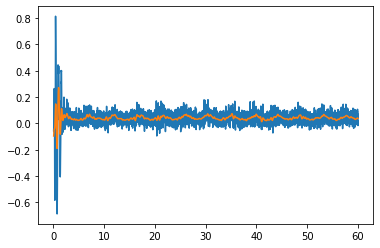

In [ ]:
ygdipakex = data['xAxis']
fs = 50
nyq = 0.5 * fs
order = 2
cutoff =  0.8
hasil = butter_lowpass_filter(ygdipakex, cutoff, fs, order)

plt.plot(data['time'], data['xAxis'])
plt.plot(data['time'], hasil)
plt.show()

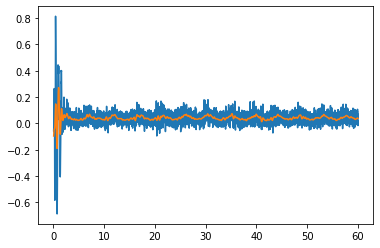

In [ ]:
ygdipakez = data['xAxis']
fs = 50
nyq = 0.5 * fs
order = 2
cutoff =  0.8
hasil = butter_lowpass_filter(ygdipakex, cutoff, fs, order)

plt.plot(data['time'], data['xAxis'])
plt.plot(data['time'], hasil)
plt.show()

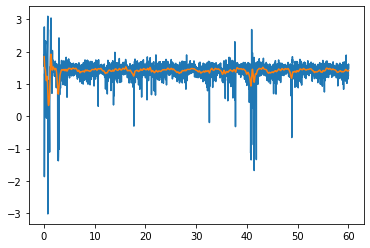

In [ ]:
hasilinklinasizx =  np.arctan2(data.zAxis,data.xAxis)

yangdipakezx = hasilinklinasizx
fs = 50
nyq = 0.5 * fs
order = 2
cutoff =  0.8
hasil2 = butter_lowpass_filter(yangdipakezx, cutoff, fs, order)

plt.plot(data['time'], hasilinklinasizx)
plt.plot(data['time'], hasil2)
plt.show()

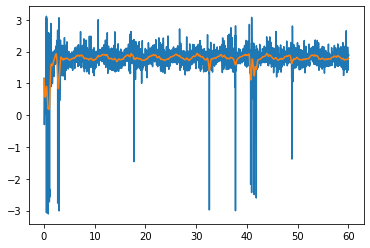

In [ ]:
hasilinklinasizy =  np.arctan2(data.zAxis,data.yAxis)

yangdipakezy = hasilinklinasizy
fs = 50
nyq = 0.5 * fs
order = 2
cutoff =  0.8
hasil3 = butter_lowpass_filter(yangdipakezy, cutoff, fs, order)

plt.plot(data['time'], hasilinklinasizy)
plt.plot(data['time'], hasil3)
plt.show()

In [ ]:
from scipy.signal import find_peaks
